# Generating Paths

#### Imports

In [504]:
import os, sys
import six

In [505]:
import numpy as np
import pandas as pd

In [506]:
sys.path.append(os.path.abspath('../'))

In [507]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [508]:
# Import local classes
from src.models.gbm import GeometricBrownianMotion
from src.models.ou import OrnsteinUhlenbeckProcess
from src.models.bridge import BrownianBridge

### Testing the Ornstein Uhlenbeck

In [509]:
ou = OrnsteinUhlenbeckProcess(volatility=0.05, long_term_mean=0.15, mean_reversion=5.0, initial_value=0.050)

<Axes: >

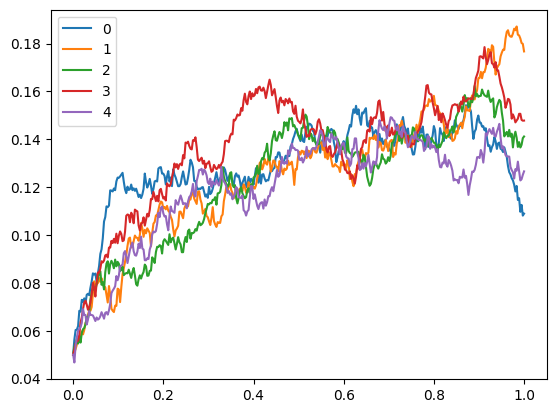

In [510]:
ou_paths = ou.generate(100, regenerate=True)
ou_paths.iloc[:, 0:5].plot()

In [511]:
ou.theoretical_expectation()

0.14932620530009144

In [512]:
ou_paths.iloc[-1, :].mean()

0.14856140953418076

In [513]:
ou.theoretical_std_dev()

0.01581102937880894

In [514]:
ou_paths.iloc[-1, :].std()

0.015725169751800723

### Testing the Geometric Brownian Motion

In [515]:
gbm = GeometricBrownianMotion(volatility=0.25, initial_value=1.0, maturity=1.0, time_intervals=365)

<Axes: >

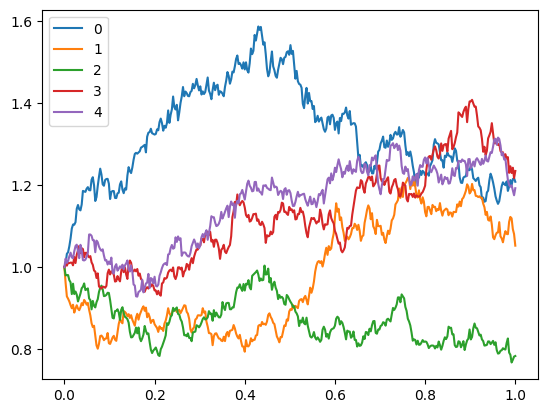

In [516]:
df_gbm = gbm(100)
df_gbm.iloc[:, 0:5].plot()

In [517]:
np.mean(df_gbm.iloc[-1, :])

1.0249111737079215

In [518]:
gbm.theoretical_expectation()

1.0

In [519]:
df_gbm.iloc[-1, :].std()

0.2478570153126494

In [520]:
gbm.theoretical_std_dev()

0.2539575927548915

### Testing the Brownian Bridge

In [533]:
bb = BrownianBridge(0.25)

In [534]:
paths_bb = bb.generate(1000)

<Axes: >

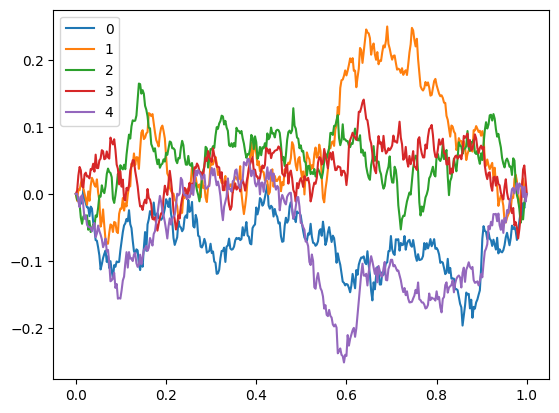

In [535]:
paths_bb.iloc[:, 0:5].plot()

In [536]:
paths_bb.iloc[0,:].mean()

0.0

In [537]:
paths_bb.iloc[-1,:].mean()

0.0

<Axes: >

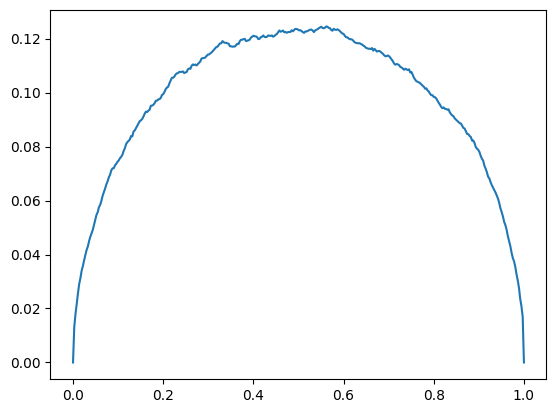

In [538]:
paths_bb.std(axis=1).plot()